In [1]:
from math import exp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from decimal import Decimal, localcontext


In [2]:
def DiP():
    c = [0, 0, 1/5, 3/10, 4/5, 8/9, 1, 1]
    b=[35/384,0,500/1113,125/192,-2187/6784,11/84,0]
    a = [[], [], [0, 1/5], [0, 3/40, 9/40],[0, 44/45, -56/15, 32/9],[0, 19372/6561, -25360/2187, 64448/6561, -212/729],[0, 9017/3168, -355/33, 46732/5247, 49/176, -5103/18656],[0, 35/384, 0, 500/1113, 125/192, -2187/6784, 11/84] ]
    b1 = [5179/57600,0,7571/16695,393/640,-92097/339200,187/2100,1/40]
    return a,b,c,b1

In [3]:
def h_change(facmax, tol, grerror, h):
    facmin = 0.8
    return h * min(facmax, max(facmin, 0.9*(tol/grerror)**(1/6)))

def xi(t, x, y, px, py):
    return y

def yi(t, x, y, px, py):
    return -x*(abs(py*x))**(1/3)
    #return -x/(2*3**0.5)*(((py*py*x*x+1)**(1/2)-py*x)**(1/3)-((py*py*x*x+1)**(1/2)+py*x)**(1/3))

def pxi(t, x, y, px, py):
    return py*(abs(py*x))**(1/3)
    #return py/(2*3**0.5)*(((py*py*x*x+1)**(1/2)-py*x)**(1/3)-((py*py*x*x+1)**(1/2)+py*x)**(1/3))

def pyi(t, x, y, px, py):
    return -px

def zi(t,x,y,px,py):
    return (abs(py*x))**(4/3)
    #return ((2*3**0.5)*(((py*py*x*x+1)**(1/2)-py*x)**(1/3)-((py*py*x*x+1)**(1/2)+py*x)**(1/3)))**4+0.5*((2*3**0.5)*(((py*py*x*x+1)**(1/2)-py*x)**(1/3)-((py*py*x*x+1)**(1/2)+py*x)**(1/3)))**2



In [4]:
def XY(T,  tol,  x0,  y0,  px0,  py0):
    
    global tgraf,xgraf,ygraf,pxgraf,pygraf
    integ = 0
    x = x0
    al=DiP()
    a=al[0]
    b=al[1]
    c=al[2]
    bb=al[3]
    y = y0
    px = px0
    py = py0
    t = 0
    h = 0.01
    X1 = 0
    Y1 = 0
    PX1 = 0
    PY1 = 0
    X2 = 0
    Y2 = 0
    PX2 = 0
    PY2 = 0
    error=[0 for i in range(4)]
    k = [[0,0] for i in range(8)]
    kp = [[0,0] for i in range(8)]
    
    if (ind == 1):
        tgraf.append(t)
        xgraf.append(x)
        ygraf.append(y)
        pxgraf.append(px)
        pygraf.append(py)

    while (t < T):
        for i in range(7):
            x_local=x
            y_local=y
            px_local=px
            py_local=py
            t_local=t+c[i+1]*h
            for j in range(i):
                q=a[i+1][j+1]*h
                x_local+=k[j][0]*q
                y_local+=k[j][1]*q
                px_local+=kp[j][0]*q
                py_local+=kp[j][1]*q
                
            
            k[i][0]=xi(t_local,x_local,y_local,px_local,py_local)
            k[i][1]=yi(t_local,x_local,y_local,px_local,py_local)
            kp[i][0]=pxi(t_local,x_local,y_local,px_local,py_local)
            kp[i][1]=pyi(t_local,x_local,y_local,px_local,py_local)
       

        X1 = x
        Y1 = y
        PX1 = px
        PY1 = py
        X2 = x
        Y2 = y
        PX2 = px
        PY2 = py
        for i in range(7):
            X1 += (h * b[i] * k[i][0])
            X2 += (h * bb[i] * k[i][0])
            Y1 += (h * b[i] * k[i][1])
            Y2 += (h * bb[i] * k[i][1])
            PX1 += (h * b[i] * kp[i][0])
            PX2 += (h * bb[i] * kp[i][0])
            PY1 += (h * b[i] * kp[i][1])
            PY2 += (h * bb[i] * kp[i][1])


        
        error[0] = abs(X2 - X1)
        error[1] = abs(Y2 - Y1)
        error[2] = abs(PX2 - PX1)
        error[3] = abs(PY2 - PY1)
        #print(error[0], error[1],error[2],error[3])
        grerror = max(error[0], error[1], error[2], error[3])

        if (grerror <= tol):
            if (ind == 1):
                tgraf.append(t)
                xgraf.append(x)
                ygraf.append(y)
                pxgraf.append(px)
                pygraf.append(py)
                
            x = X1
            y = Y1
            px = PX1
            py = PY1
            integ += zi(t,x,y,px,py) * h
            if (ind == 1):
                print(t,integ)
            t += h
            h = h_change(1.1, tol, grerror, h)
            
        else:
            h = h_change(1.1, tol, grerror, h)

        if (t + h > T):
            h = T- t
            t += h
            
            for i in range(7):
                x_local=x
                y_local=y
                px_local=px
                py_local=py
                t_local=t+c[i+1]*h
                
                for j in range(i):
                    q=a[i+1][j+1]*h
                    x_local+=k[j][0]*q
                    y_local+=k[j][1]*q
                    px_local+=kp[j][0]*q
                    py_local+=kp[j][1]*q

                k[i][0]=xi(t_local,x_local,y_local,px_local,py_local)
                k[i][1]=yi(t_local,x_local,y_local,px_local,py_local)
                kp[i][0]=pxi(t_local,x_local,y_local,px_local,py_local)
                kp[i][1]=pyi(t_local,x_local,y_local,px_local,py_local)

            X1 = x
            Y1 = y
            PX1 = px
            PY1 = py
            for i in range(7):
                X1 += (h * b[i] * k[i][0])
                Y1 += (h * b[i] * k[i][1])
                PX1 += (h * b[i] * kp[i][0])
                PY1 += (h * b[i] * kp[i][1])
            
            x = X1
            y = Y1
            px = PX1
            py = PY1
            integ += zi(t,x,y,px,py) * h
            if (ind == 1):
                print(t, integ)
                tgraf.append(t)
                xgraf.append(x)
                ygraf.append(y)
                pxgraf.append(px)
                pygraf.append(py)
        
    global xt
    xt= x
    global yt
    yt = y
    global pxt
    pxt = px
    global pyt
    pyt = py
    
    return None





In [6]:
ind = 0
xgraf, ygraf, pxgraf, pygraf,tgraf = [],[],[],[],[]
xt = 0
yt = 0
pxt = 0
pyt = 0
N = 0

y0 = 0.3
x1 = 0
py0 = 0
px1 = 0.5

alpha1 = 1     
alpha2 = 1  
T = 4.1
delta = 10**-8
Gamma = 1
tol = 10** -7
EPS = 10** -9

iii=-1
fl = False
for alpha1 in range(10):
    if fl:
        break
    for delta_power in range(8,9):
        if fl:
            break
        delta = 10**(-delta_power)
        for tol_power in range(8,9):
            if fl:
                break
            tol = 10**(-tol_power)
            for EPS_power in range(8,9):
                if fl:
                    break
                EPS = 10**(-EPS_power)
                try:
                    if fl:
                        break
                    alpha_1=alpha1
                    alpha_2=alpha2
                    XY(T, tol, alpha1, y0, alpha2, py0)

                    N1 = xt - x1
                    N2 = pxt - px1
                    xpr = 0
                    pxpr = 0

                    while ((N1**2+ N2**2)**0.5 > EPS):
                        xpr = N1
                        pxpr = N2
                        B1 = -N1
                        B2 = -N2

                        XY(T, tol, alpha1 + delta, y0, alpha2, py0)
                        xN1 = xt - x1
                        pxN1 = pxt - px1
                        X11 = (xN1 - xpr) / delta
                        X21 = (pxN1 - pxpr) / delta

                        XY(T, tol, alpha1, y0, alpha2 + delta, py0)
                        xN2 = xt - x1
                        pxN2 = pxt - px1
                        X12 = (xN2 - xpr) / delta
                        X22 = (pxN2 - pxpr) / delta

                        det = X11 * X22 - X12 * X21
                        detx = B1 * X22 - B2 * X12
                        dety = B2 * X11 - B1 * X21
                        alphaN1 = alpha1 + Gamma * (detx / det)
                        alpha1 = alphaN1
                        alphaN2 = alpha2 + Gamma * (dety / det)
                        alpha2 = alphaN2
                        XY(T, tol, alpha1, y0, alpha2, py0)
                        N1 = xt - x1
                        N2 = pxt - px1
                        ++N
                        while ((((N1**2 + N2**2)**0.5) > (xpr** 2 + pxpr** 2)**0.5) and Gamma > 2**-30):
                            Gamma /= 2
                            alpha1 = alphaN1 + Gamma * (detx / det)
                            alpha2 = alphaN2 + Gamma * (dety / det)
                            XY(T, tol, alpha1, y0, alpha2, py0)
                            N1 = xt - x1
                            N2 = pxt - px1
                        Gamma = 1
                    #print(N)

                    ind = 1
                    print('pifpafka:', alpha_1,alpha_2,iii)
                    XY(T, tol, alpha1, y0, alpha2, py0)
                    fl = True
                except ZeroDivisionError:
                    pass
print(xgraf[len(xgraf)-1],ygraf[len(ygraf)-1],pxgraf[len(pxgraf)-1],pygraf[len(pygraf)-1])






pifpafka: 0 1 -1
0 1.3893874637371455e-09
0.01 7.129373601829145e-09
0.021 5.6268802780904194e-08
0.033100000000000004 2.3215030377182302e-07
0.04641000000000001 6.954412744308883e-07
0.06105100000000001 1.732607932890573e-06
0.0771561 3.8301833442677165e-06
0.09487171000000001 7.78727606185733e-06
0.11435888100000002 1.4884399614297841e-05
0.13579476910000005 2.713478611684098e-05
0.15937424601000005 4.765583994976972e-05
0.18531167061100007 8.121461324044016e-05
0.21384283767210008 0.00013502388978985297
0.2452271214393101 0.00021989686672717828
0.2797498335832411 0.0003519111777735979
0.3177248169415653 0.0005547899482982346
0.35949729863572183 0.0008632810300898978
0.40544702849929404 0.001327905722856358
0.4559917313492235 0.002021549902335761
0.5115909044841459 0.0030484665214504532
0.5727499949325605 0.004556308708177675
0.6400249944258166 0.0067517343592582305
0.7140274938683984 0.009919760593527647
0.7954302432552383 0.014446129569292702
0.8849732675807621 0.020840047624870274

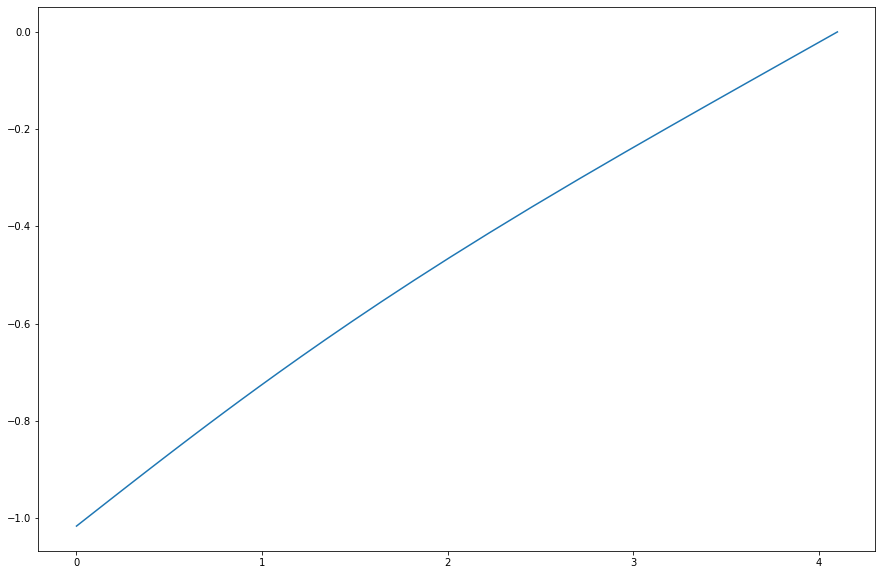

In [26]:


fig = plt.subplots(figsize = [15,10])

plt.plot(tgraf,xgraf)
plt.show()

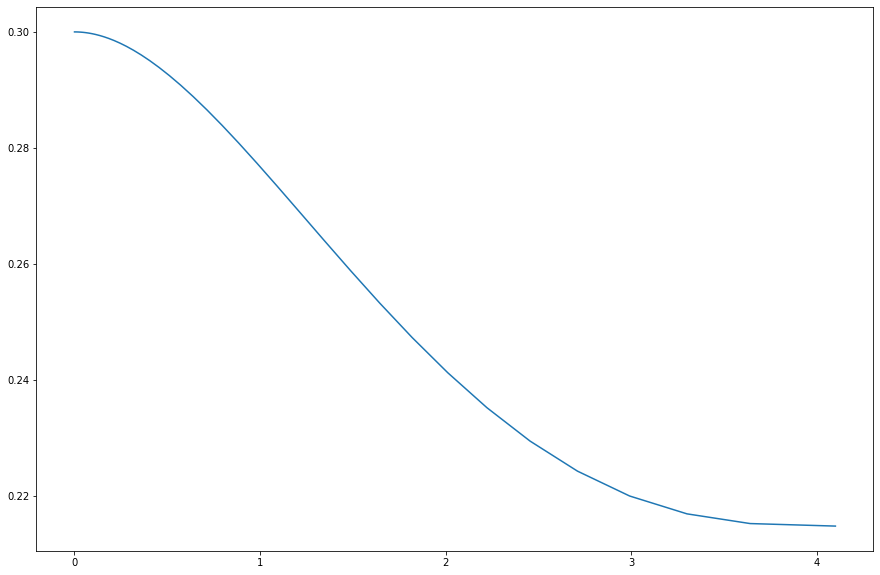

In [22]:
fig = plt.subplots(figsize = [15,10])

plt.plot(tgraf,ygraf)
plt.show()

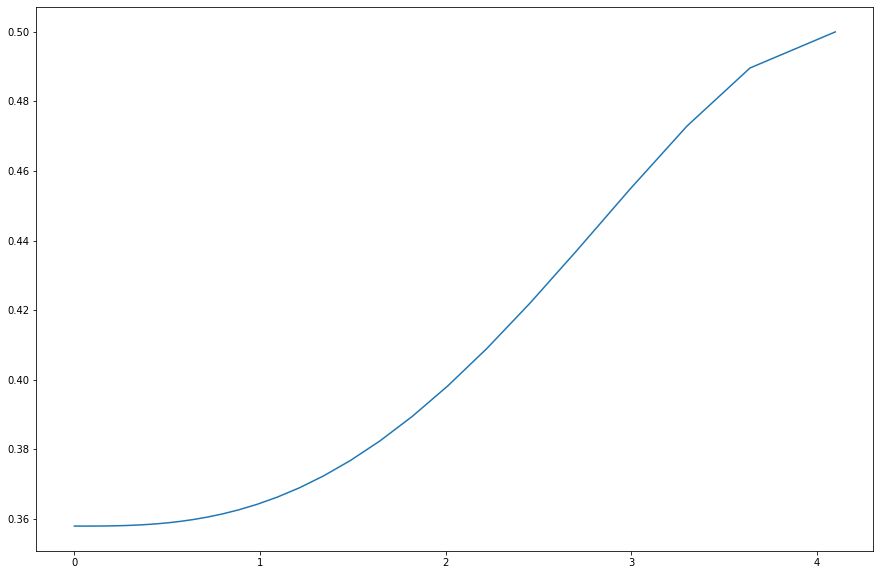

In [23]:
fig = plt.subplots(figsize = [15,10])

plt.plot(tgraf,pxgraf)
plt.show()

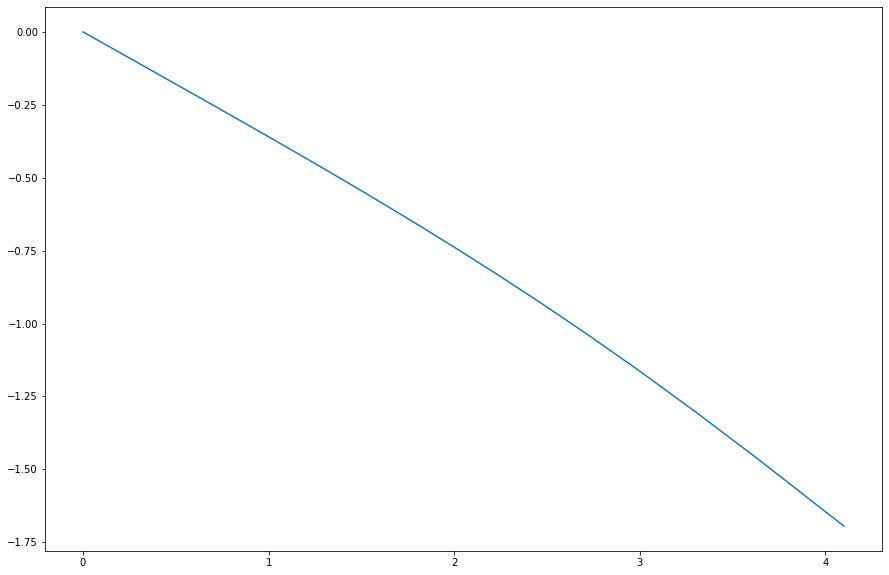

In [24]:
fig = plt.subplots(figsize = [15,10])

plt.plot(tgraf,pygraf)
plt.show()